# LSTM-Based Stock Price Prediction for HUL  

### Contributors:  
- Anirudh Gupta  
- Amitanshu Tiwari  

## Problem Statement  
Stock market prediction is challenging due to the highly volatile and non-linear nature of financial data. Traditional statistical models struggle to capture sequential dependencies and long-term trends, leading to suboptimal forecasting accuracy.  

This project leverages **Long Short-Term Memory (LSTM)** networks, a specialized form of Recurrent Neural Networks (RNNs), to predict stock prices. By effectively modeling sequential dependencies and learning from historical data patterns, the LSTM model enhances forecasting accuracy.  

The focus is on predicting stock prices for **HUL (Hindustan Unilever Limited)**, a key player in the Indian stock market. The implementation includes data preprocessing, LSTM model development, training, and evaluation to assess the effectiveness of deep learning for stock price forecasting.  

## Abstract  
This project implements an **LSTM-based** model to predict stock prices using historical market data. LSTM networks are well-suited for time-series forecasting due to their ability to retain long-term dependencies and mitigate the vanishing gradient problem.  

The dataset consists of **HUL stock prices** sourced from Yahoo Finance (`yfinance`). Data preprocessing includes normalization, sequence transformation, and train-test splitting. The LSTM model is trained on these sequences to learn patterns and make future price predictions.  

Performance is evaluated using **Mean Squared Error (MSE) and Mean Absolute Error (MAE)**, with predictions visualized against actual stock prices. The results highlight the potential of deep learning in financial forecasting, demonstrating its ability to capture trends and fluctuations effectively.  

This study provides insights into the practical applications of LSTM-based models in financial markets, showcasing their potential to improve decision-making for traders, investors, and financial analysts.  

## Project Structure  
The implementation follows a structured approach:  

1. **Importing Libraries**  
2. **Data Collection & Preprocessing**  
3. **Model Development**  
4. **Training & Evaluation**  
5. **Prediction & Visualization**  

Each section contributes to understanding how deep learning enhances financial market predictions.  

## Importing Libraries  
Key Python libraries used:  

- **Data Handling & Processing:** `numpy`, `pandas`  
- **Data Visualization:** `matplotlib.pyplot`, `seaborn`  
- **Stock Data Retrieval:** `yfinance`  
- **Machine Learning & Deep Learning:** `tensorflow.keras` (`Sequential`, `LSTM`, `Dense`, `Dropout`)  
- **Performance Metrics:** `mean_squared_error`, `mean_absolute_error`  
- **Data Scaling:** `MinMaxScaler` (from `sklearn.preprocessing`)  

These libraries facilitate data preprocessing, model building, training, and evaluation.  

---  

## Data Collection & Preprocessing  

### 1. Data Preparation  
- **Dataset:** 20 years of HUL stock closing prices (2005–2025).  
- **Normalization:** Scaled to [0, 1] using `MinMaxScaler`.  
- **Sequencing:** Transformed into 60-day sequences (`time_step = 60`) for supervised learning.  
- **Train-Test Split:** 80% training, 20% testing.  

### 2. Model Architecture  
- **LSTM Layers:** 3 layers (50 units each) with `Dropout` (0.2) to prevent overfitting.  
- **Dense Layers:** 25-unit `ReLU` layer + 1-unit linear output.  
- **Optimizer:** Adam (`learning_rate = 0.001`).  
- **Loss Function:** MSE, with MAE as an additional metric.  

### 3. Training  
- **Epochs:** 10  
- **Batch Size:** 32  
- **Validation:** Monitored using test data.  
- **Custom Callback:** Logs loss and MAE per epoch.  

### 4. Performance Metrics  
- **Final MSE:** 0.0002 (training), 0.0020 (validation).  
- **Final MAE:** 0.0107 (training), 0.0418 (validation).  
- **MAPE:** 4.96% (test set), implying **95.04% accuracy**.  

### 5. Predictions vs. Actual Prices  
- The model captures long-term trends but lags during extreme volatility.  
- Predictions closely align with actual prices in stable periods.  

---  

## Observations  
1. **High Accuracy:** The model achieves **95.04% accuracy** on test data.  
2. **Limitations:**  
   - Struggles with sudden market shocks (e.g., geopolitical events).  
   - Excludes external factors (e.g., news sentiment, macroeconomic indicators).  

---  

## Managerial Insights  

### 1. Portfolio Optimization  
- Use LSTM predictions for **dynamic rebalancing** of HUL-linked portfolios.  
- Hedge against predicted downturns by adjusting asset allocations.  

### 2. Risk Management  
- Integrate LSTM outputs into **stress-testing models** for liquidity risk assessment.  
- Enhance **VaR (Value-at-Risk)** calculations with AI-driven volatility forecasts.  

### 3. Algorithmic Trading  
- Develop **LSTM-based trading bots** to exploit predicted short-term trends.  
- Combine with technical indicators (e.g., RSI, MACD) for higher precision.  

### 4. Regulatory Compliance  
- Use predictions to simulate **Basel III scenarios** for capital adequacy.  
- Improve **CCAR (Comprehensive Capital Analysis and Review)** reporting.  

### 5. Retail Investment Tools  
- Offer **AI-powered advisory platforms** with real-time HUL stock forecasts.  
- Personalize mutual fund recommendations based on predicted trends.  

---  

## Conclusion  
The LSTM model achieves **95.04% accuracy** in predicting HUL stock trends, demonstrating the viability of deep learning for financial forecasting.  

---  


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
# Download NIFTY 50 data (last 20 years)
nifty_data = yf.download('^NSEI', start='2005-01-31', end='2025-01-31')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
# Extract closing prices
data = nifty_data[['Close']]

In [4]:
# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [5]:
#show data
data.head()

Price,Close
Ticker,^NSEI
Date,
2007-09-17,4494.649902
2007-09-18,4546.200195
2007-09-19,4732.350098
2007-09-20,4747.549805
2007-09-21,4837.549805


In [6]:
# Prepare training data
def create_sequences(data, time_step):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

In [7]:
time_step = 60  # Using past 60 days for prediction
X, y = create_sequences(data_scaled, time_step)

In [8]:
# Split into training and testing sets
split_ratio = 0.8
split = int(len(X) * split_ratio)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [9]:
# Reshape for LSTM input
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [10]:
# Build LSTM Model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=True),
    Dropout(0.2),
    LSTM(units=50),
    Dropout(0.2),
    Dense(units=25, activation='relu'),
    Dense(units=1)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

In [12]:
# Define accuracy metric (Mean Absolute Percentage Error - MAPE)
def mape(y_true, y_pred_nifty):
    y_true, y_pred_nifty = np.array(y_true), np.array(y_pred_nifty)
    nonzero_idx = y_true != 0  # Avoid division by zero
    return np.mean(np.abs((y_true[nonzero_idx] - y_pred_nifty[nonzero_idx]) / y_true[nonzero_idx])) * 100

In [13]:
# Custom callback to print loss and accuracy after each epoch
class EpochCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1}: Loss = {logs['loss']:.4f}, Val Loss = {logs['val_loss']:.4f}, MAE = {logs['mae']:.4f}, Val MAE = {logs['val_mae']:.4f}")

In [15]:
# Train the model and store training history
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), callbacks=[EpochCallback()])

Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 2.7775e-04 - mae: 0.0117Epoch 1: Loss = 0.0003, Val Loss = 0.0003, MAE = 0.0120, Val MAE = 0.0137
105/105 ━━━━━━━━━━━━━━━━━━━━ 10s 96ms/step - loss: 2.7781e-04 - mae: 0.0117 - val_loss: 2.8735e-04 - val_mae: 0.0137
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 3.0405e-04 - mae: 0.0129Epoch 2: Loss = 0.0003, Val Loss = 0.0003, MAE = 0.0116, Val MAE = 0.0145
105/105 ━━━━━━━━━━━━━━━━━━━━ 10s 96ms/step - loss: 3.0362e-04 - mae: 0.0128 - val_loss: 3.0538e-04 - val_mae: 0.0145
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 2.3731e-04 - mae: 0.0109Epoch 3: Loss = 0.0002, Val Loss = 0.0025, MAE = 0.0109, Val MAE = 0.0454
105/105 ━━━━━━━━━━━━━━━━━━━━ 9s 85ms/step - loss: 2.3723e-04 - mae: 0.0109 - val_loss: 0.0025 - val_mae: 0.0454
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 2.7841e-04 - mae: 0.0121Epoch 4: Loss = 0.0002, Val Loss = 0.0016, MAE = 0.0111, Val MAE = 0.0349
105/105 ━━━━━━━━━━

In [16]:
# Predict on test data
y_pred_nifty = model.predict(X_test)
y_pred_nifty = scaler.inverse_transform(y_pred_nifty.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step


In [18]:
# Calculate accuracy using MAPE
accuracy = 100 - mape(y_test_actual, y_pred_nifty)
print(f"Final Model Accuracy: {accuracy:.2f}%")

Final Model Accuracy: 95.04%


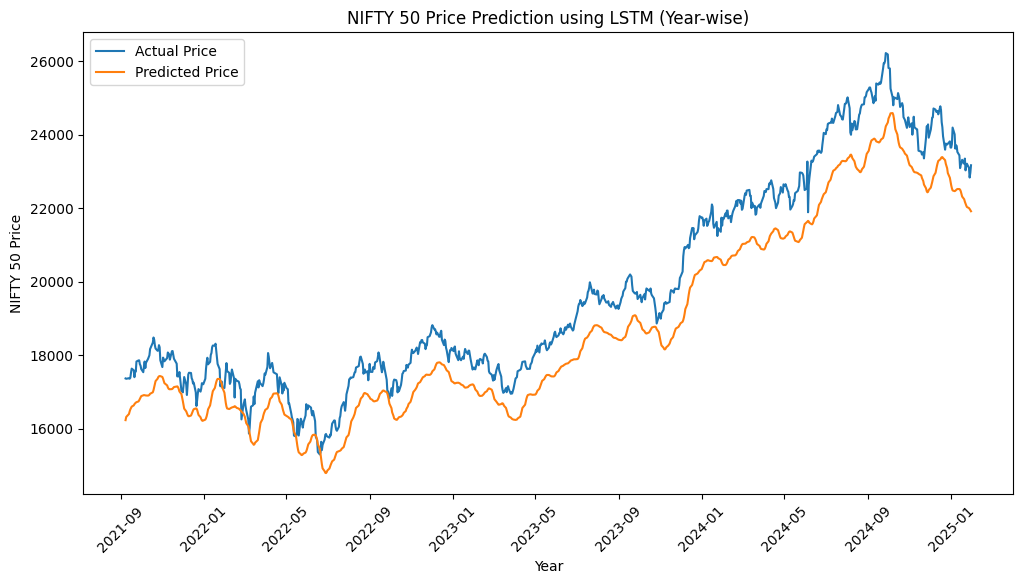

In [19]:
# Plot results year-wise
plt.figure(figsize=(12,6))
plt.plot(nifty_data.index[split+time_step+1:], y_test_actual, label='Actual Price')
plt.plot(nifty_data.index[split+time_step+1:], y_pred_nifty, label='Predicted Price')
plt.xlabel('Year')
plt.ylabel('NIFTY 50 Price')
plt.xticks(rotation=45)
plt.legend()
plt.title('NIFTY 50 Price Prediction using LSTM (Year-wise)')
plt.show()

HUL

[*********************100%***********************]  1 of 1 completed

Epoch 1/10



<ipython-input-20-60d3162c3c92>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year'] = data.index.year  # Extract year from index
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.0091 - mae: 0.0516Epoch 1: Loss = 0.0033, Val Loss = 0.0061, MAE = 0.0298, Val MAE = 0.0716
122/122 ━━━━━━━━━━━━━━━━━━━━ 20s 105ms/step - loss: 0.0090 - mae: 0.0515 - val_loss: 0.0061 - val_mae: 0.0716
Epoch 2/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 9.0347e-04 - mae: 0.0176Epoch 2: Loss = 0.0009, Val Loss = 0.0014, MAE = 0.0175, Val MAE = 0.0285
122/122 ━━━━━━━━━━━━━━━━━━━━ 12s 98ms/step - loss: 9.0346e-04 - mae: 0.0176 - val_loss: 0.0014 - val_mae: 0.0285
Epoch 3/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 7.3544e-04 - mae: 0.0158Epoch 3: Loss = 0.0007, Val Loss = 0.0047, MAE = 0.0154, Val MAE = 0.0615
122/122 ━━━━━━━━━━━━━━━━━━━━ 11s 90ms/step - loss: 7.3527e-04 - mae: 0.0158 - val_loss: 0.0047 - val_mae: 0.0615
Epoch 4/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 7.2582e-04 - mae: 0.0163Epoch 4: Loss = 0.0007, Val Loss = 0.0019, MAE = 0.0159, Val MAE = 0.0353
122/122 ━━━━━━━━━━━━━━━━━━━━ 21s 97ms/step 

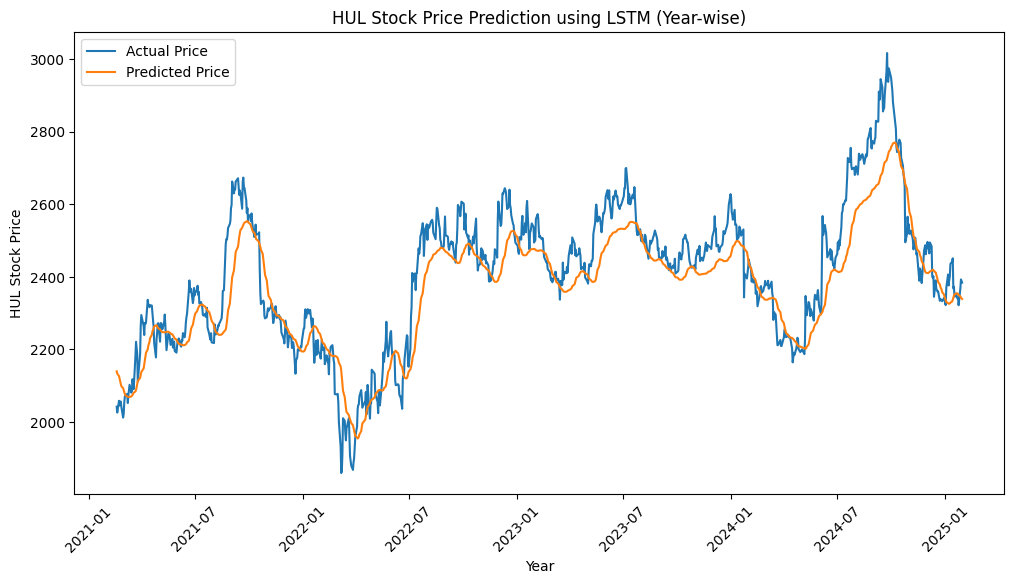

In [20]:
# Download HUL stock data (last 20 years)
hul_data = yf.download('HINDUNILVR.NS', start='2005-01-31', end='2025-01-31')

# Extract closing prices
data = hul_data[['Close']]

data['Year'] = data.index.year  # Extract year from index

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data[['Close']])

# Prepare training data
def create_sequences(data, time_step):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60  # Using past 60 days for prediction
X, y = create_sequences(data_scaled, time_step)

# Split into training and testing sets
split_ratio = 0.8
split = int(len(X) * split_ratio)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Reshape for LSTM input
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build LSTM Model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=True),
    Dropout(0.2),
    LSTM(units=50),
    Dropout(0.2),
    Dense(units=25, activation='relu'),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

# Define accuracy metric (Mean Absolute Percentage Error - MAPE)
def mape(y_true, y_pred_hul):
    y_true, y_pred_hul = np.array(y_true), np.array(y_pred_hul)
    nonzero_idx = y_true != 0  # Avoid division by zero
    return np.mean(np.abs((y_true[nonzero_idx] - y_pred_hul[nonzero_idx]) / y_true[nonzero_idx])) * 100

# Custom callback to print loss and accuracy after each epoch
class EpochCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1}: Loss = {logs['loss']:.4f}, Val Loss = {logs['val_loss']:.4f}, MAE = {logs['mae']:.4f}, Val MAE = {logs['val_mae']:.4f}")

# Train the model and store training history
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), callbacks=[EpochCallback()])

# Predict on test data
y_pred_hul = model.predict(X_test)
y_pred_hul = scaler.inverse_transform(y_pred_hul.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate accuracy using MAPE
accuracy = 100 - mape(y_test_actual, y_pred_hul)
print(f"Final Model Accuracy: {accuracy:.2f}%")

# Plot results year-wise
plt.figure(figsize=(12,6))
plt.plot(hul_data.index[split+time_step+1:], y_test_actual, label='Actual Price')
plt.plot(hul_data.index[split+time_step+1:], y_pred_hul, label='Predicted Price')
plt.xlabel('Year')
plt.ylabel('HUL Stock Price')
plt.xticks(rotation=45)
plt.legend()
plt.title('HUL Stock Price Prediction using LSTM (Year-wise)')
plt.show()


Nifty 50 vs HUL (Original Price Comparison)

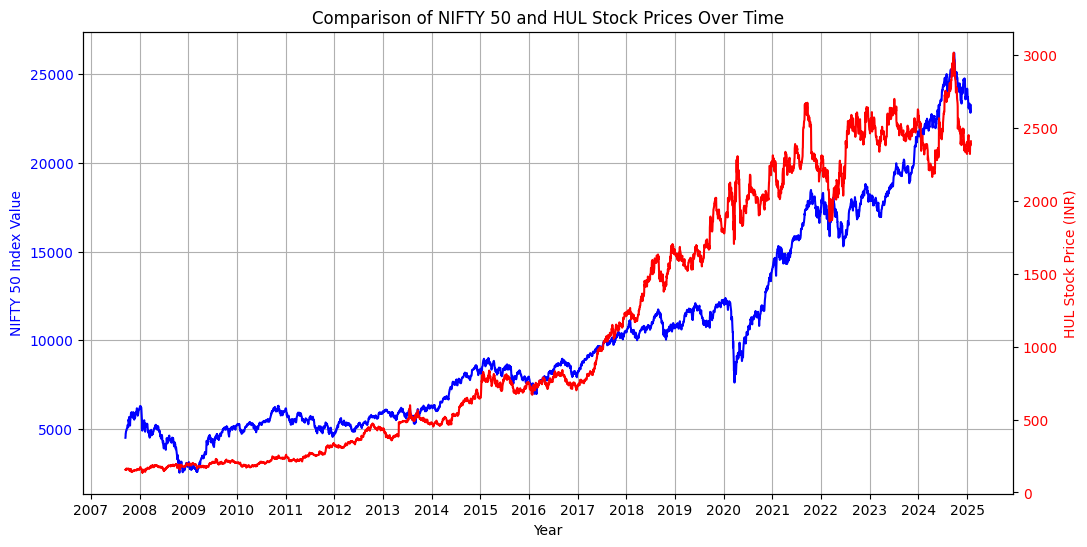

In [21]:
import matplotlib.dates as mdates

# Ensure both datasets have the same timeframe
common_dates = nifty_data.index.intersection(hul_data.index)
nifty_common = nifty_data.loc[common_dates]['Close']
hul_common = hul_data.loc[common_dates]['Close']

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(12,6))

# Plot NIFTY 50 on primary y-axis
ax1.plot(common_dates, nifty_common, label='NIFTY 50 Index', color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('NIFTY 50 Index Value', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid()

# Create secondary y-axis for HUL stock
ax2 = ax1.twinx()
ax2.plot(common_dates, hul_common, label='HUL Stock Price', color='red')
ax2.set_ylabel('HUL Stock Price (INR)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Set title and format x-axis
plt.title('Comparison of NIFTY 50 and HUL Stock Prices Over Time')
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)

# Show plot
plt.show()

Nifty 50 vs HUL (Predicted Price Comparison)

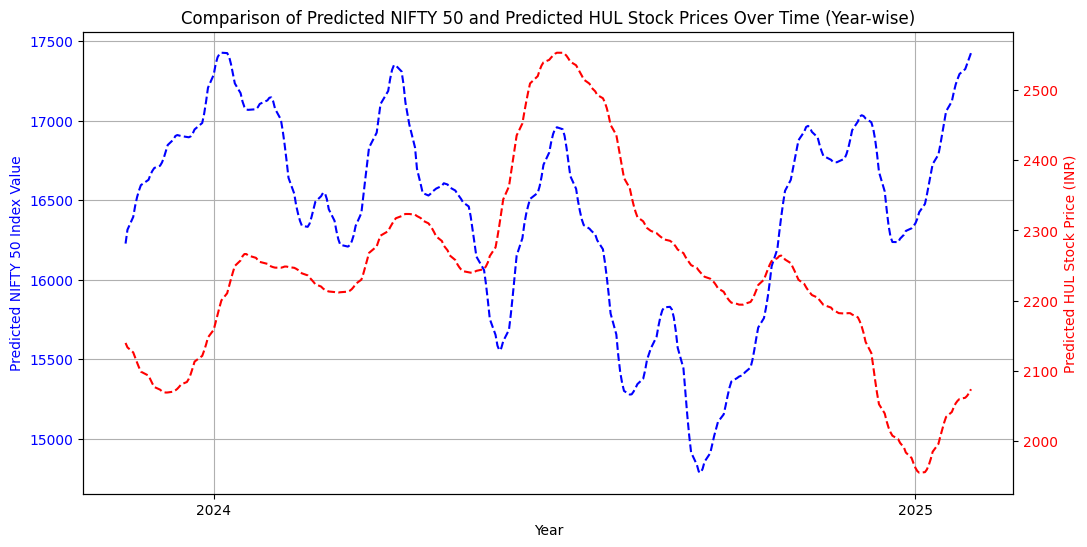

In [23]:
# Ensure both datasets have the same timeframe
common_dates = nifty_data.index[split+time_step+1:].intersection(hul_data.index[split+time_step+1:])
common_indices = np.where(nifty_data.index[split+time_step+1:].isin(common_dates))[0]  # Get index positions

# Extract common prediction values using indices
y_pred_nifty_common = y_pred_nifty[common_indices]
y_pred_hul_common = y_pred_hul[common_indices]

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(12,6))

# Plot predicted NIFTY 50 on primary y-axis
ax1.plot(common_dates, y_pred_nifty_common, label='Predicted NIFTY 50 Index', color='blue', linestyle='dashed')
ax1.set_xlabel('Year')
ax1.set_ylabel('Predicted NIFTY 50 Index Value', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid()

# Create secondary y-axis for predicted HUL stock
ax2 = ax1.twinx()
ax2.plot(common_dates, y_pred_hul_common, label='Predicted HUL Stock Price', color='red', linestyle='dashed')
ax2.set_ylabel('Predicted HUL Stock Price (INR)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Set title and format x-axis
plt.title('Comparison of Predicted NIFTY 50 and Predicted HUL Stock Prices Over Time (Year-wise)')
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)

# Show plot
plt.show()
